#### DSC 680, Project 1 - EDA and modeling
#### Kristie Kooken 


In [2]:
# loading libraries 

# loading libraries 

import numpy as np
import pandas as pd

import scipy.stats

import statistics 
import string

import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder

Data dictionary for this project: 

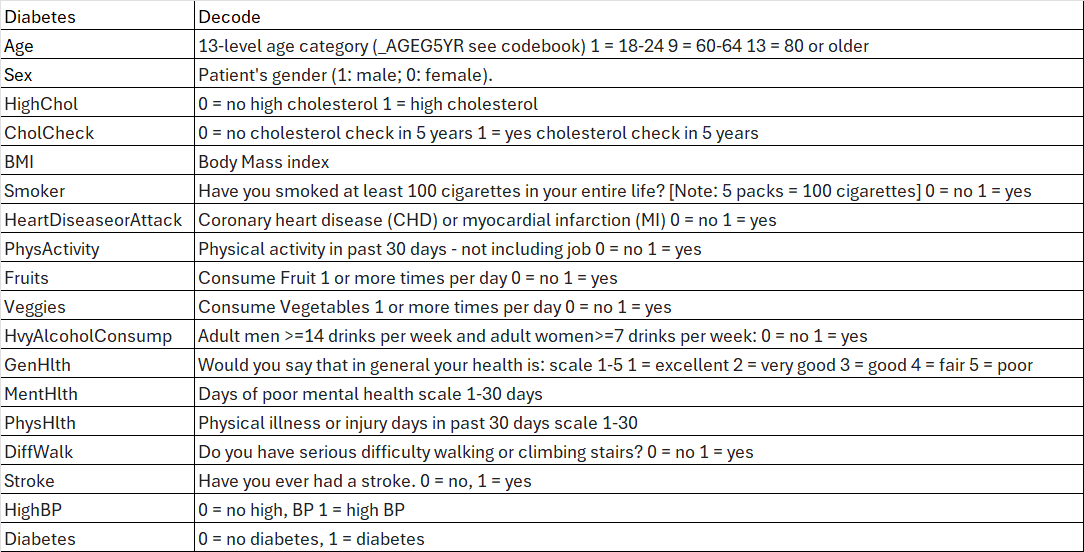

In [3]:
# Get the data.
# 1 importing the diabetes data 

lt = pd.read_csv('diabetes_data.csv')
type(lt)

pandas.core.frame.DataFrame

In [4]:
lt.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
lt.shape

(70692, 18)

In [6]:
# 2 clean up 
# missing value 

for c in lt: 
    miss = lt[c].isnull().sum()
    if miss >0: 
         print("{} has {} missing values(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))

Age has no missing values
Sex has no missing values
HighChol has no missing values
CholCheck has no missing values
BMI has no missing values
Smoker has no missing values
HeartDiseaseorAttack has no missing values
PhysActivity has no missing values
Fruits has no missing values
Veggies has no missing values
HvyAlcoholConsump has no missing values
GenHlth has no missing values
MentHlth has no missing values
PhysHlth has no missing values
DiffWalk has no missing values
Stroke has no missing values
HighBP has no missing values
Diabetes has no missing values


In [7]:
# see what type each column is 
# all columns are categorical except bmi - age is in categories 

dataTypeSeries = lt.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries.to_string())

Data type of each column of Dataframe :
Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64


In [9]:
# descriptive stats for bmi
lt['BMI'].describe()

count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

Running frequency counts on the object columns and noting that though there are no missing values, I may collapse some variables down more like Age as an example. 

In [13]:
f2 = lt.drop('BMI', axis=1)

In [14]:
b = f2.columns.tolist()
type(b)

list

In [15]:
for i in b:
    j = lt[i].value_counts()
    print(i)
    print(j)

Age
Age
10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: count, dtype: int64
Sex
Sex
0.0    38386
1.0    32306
Name: count, dtype: int64
HighChol
HighChol
1.0    37163
0.0    33529
Name: count, dtype: int64
CholCheck
CholCheck
1.0    68943
0.0     1749
Name: count, dtype: int64
Smoker
Smoker
0.0    37094
1.0    33598
Name: count, dtype: int64
HeartDiseaseorAttack
HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64
PhysActivity
PhysActivity
1.0    49699
0.0    20993
Name: count, dtype: int64
Fruits
Fruits
1.0    43249
0.0    27443
Name: count, dtype: int64
Veggies
Veggies
1.0    55760
0.0    14932
Name: count, dtype: int64
HvyAlcoholConsump
HvyAlcoholConsump
0.0    67672
1.0     3020
Name: count, dtype: int64
GenHlth
GenHlth
3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: count, dtype: int64
MentHlth
MentHl

In [22]:
my_list = lt.columns.values.tolist()
my_list

['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

In [27]:
# categorical with >2 groups 

catlist = f2[['Age', 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk']]

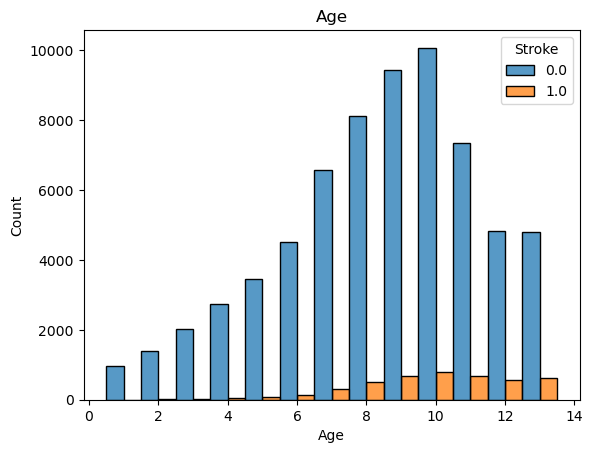

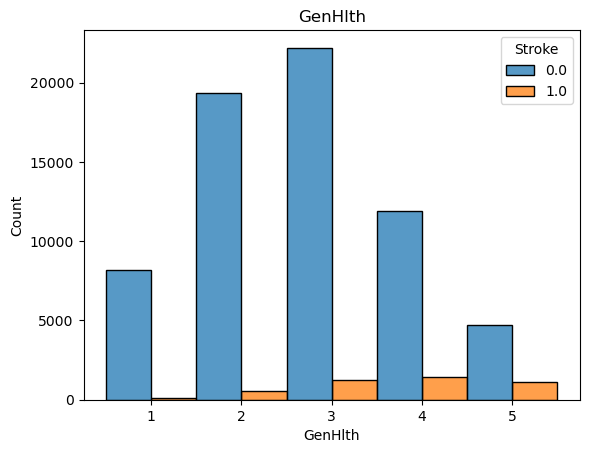

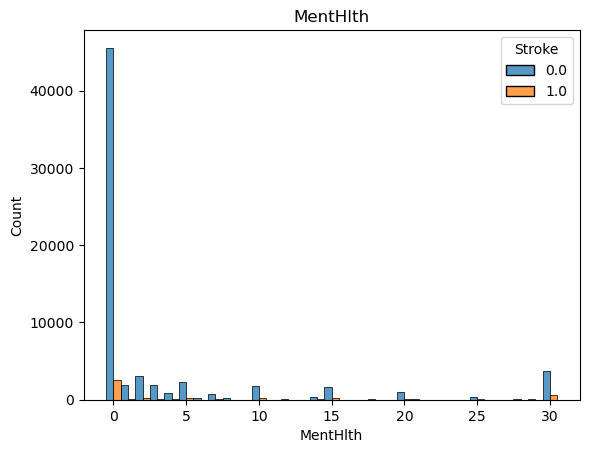

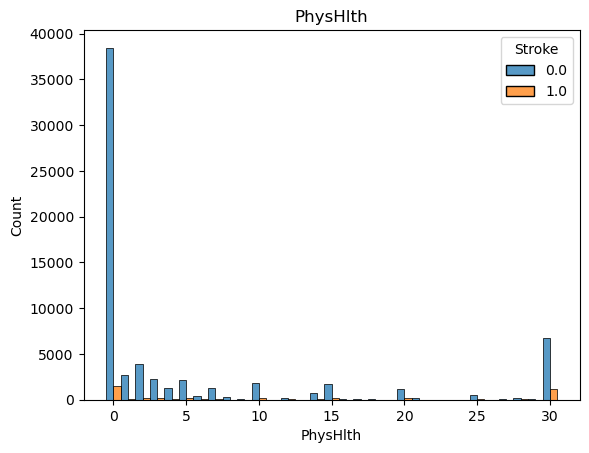

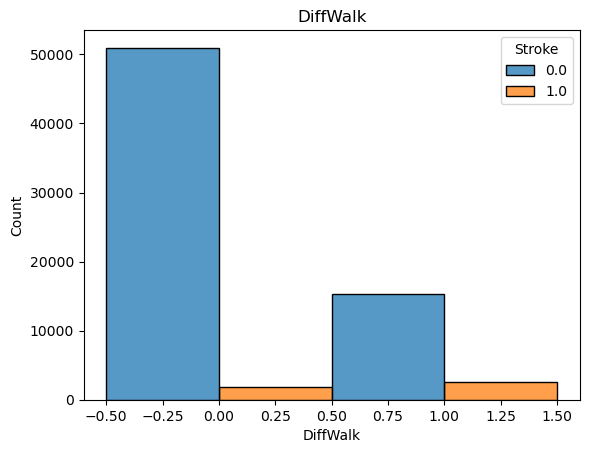

In [28]:
# histogram section
plt.rc('figure', max_open_warning = 0)

for j in catlist:
    plt.figure()
    sns.histplot(data=lt, x=j, discrete=True, hue='Stroke', multiple='dodge')
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel ("Count")
    
plt.show;

In [35]:
dilist = f2[[ 'Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'HighBP',
 'Diabetes']]

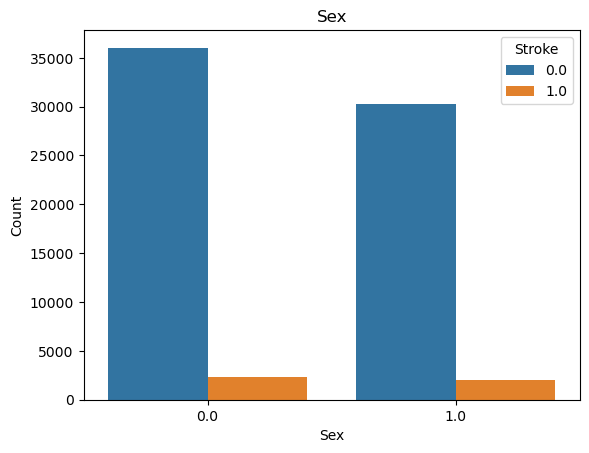

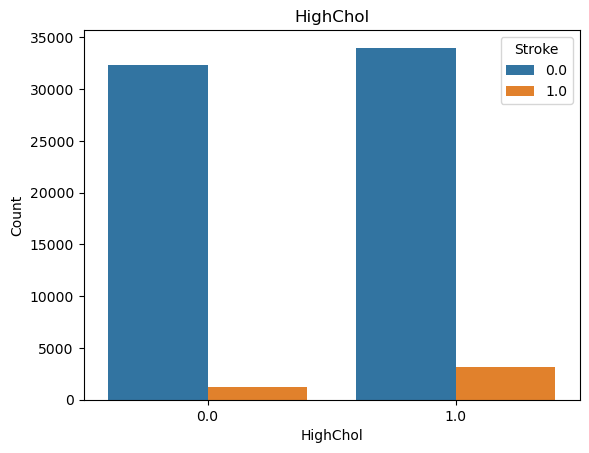

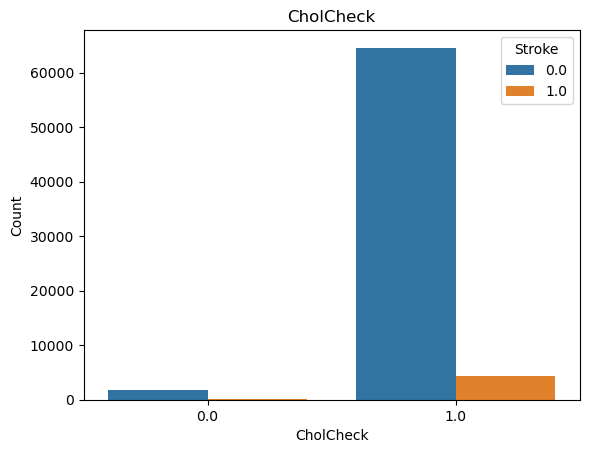

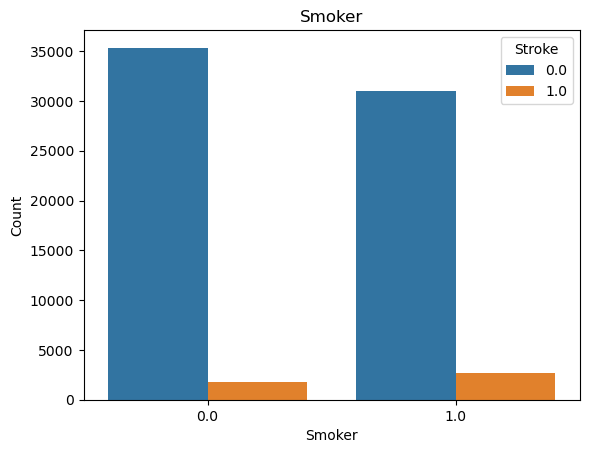

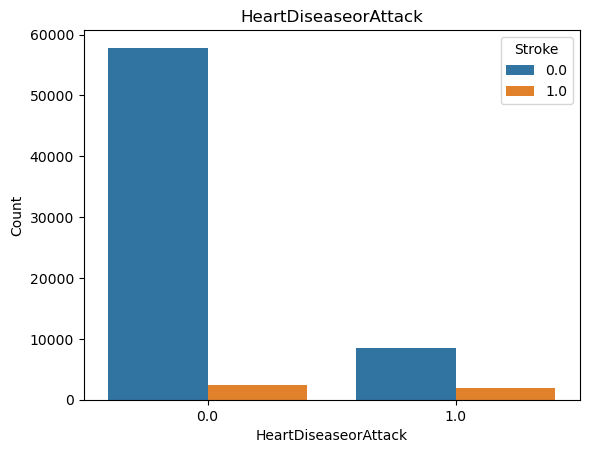

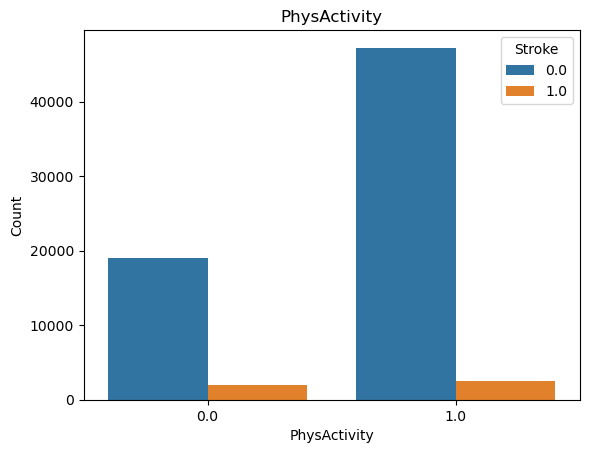

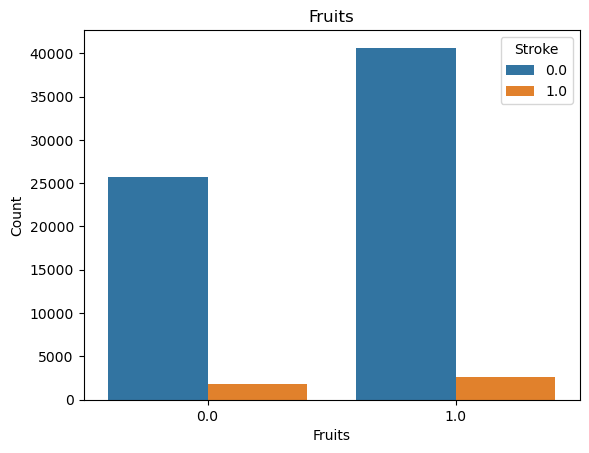

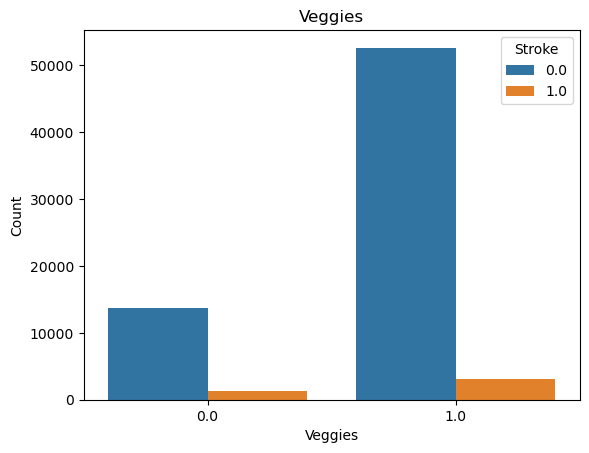

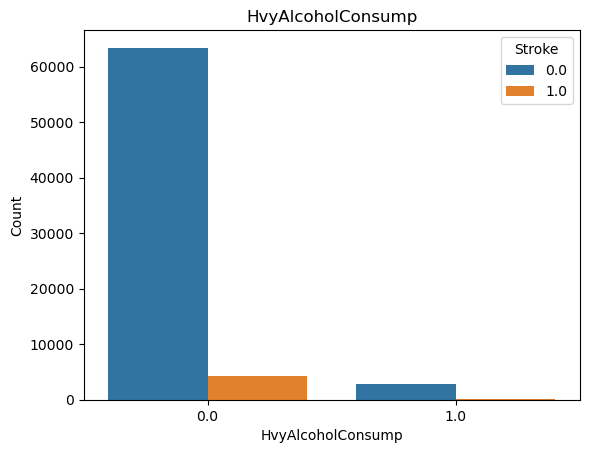

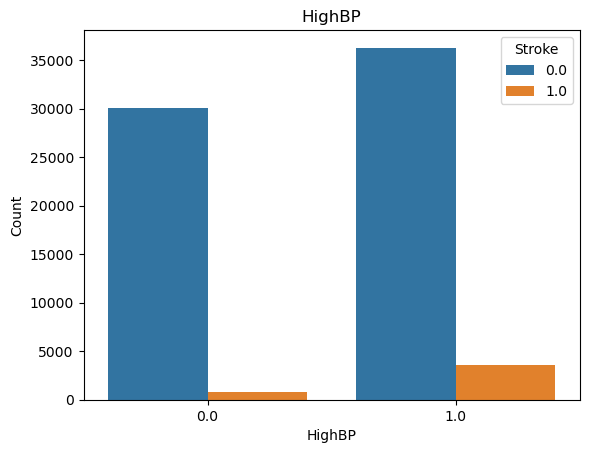

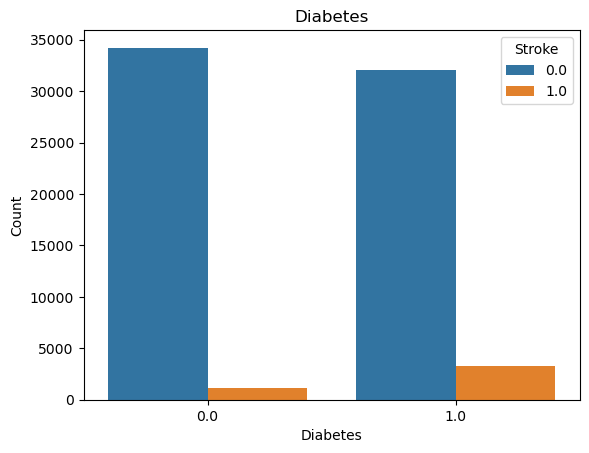

In [36]:
for i in dilist:
    plt.figure()
    sns.countplot( x=i, data=lt, hue='Stroke')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel ("Count")
    
plt.show;

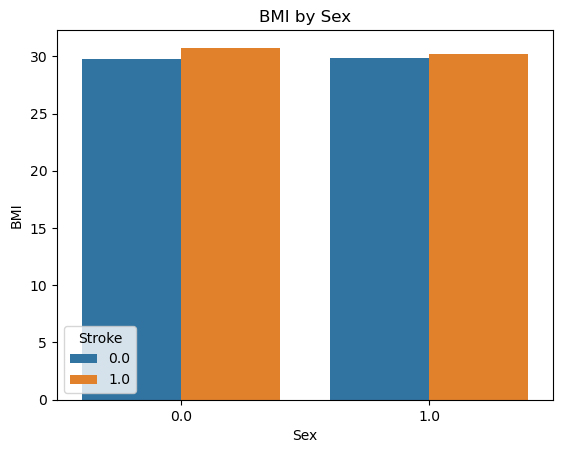

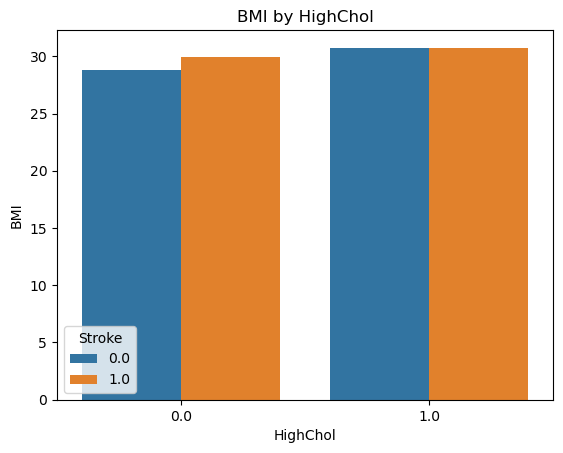

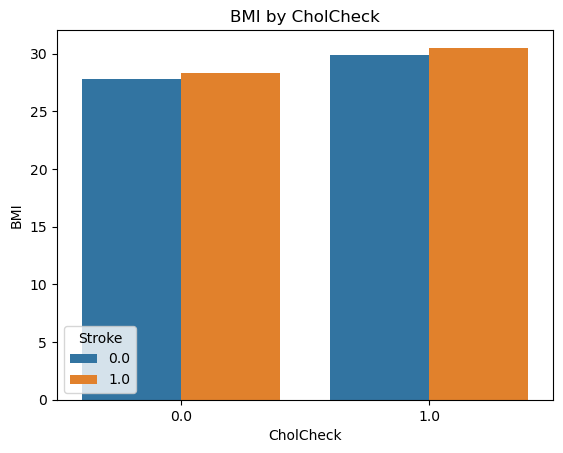

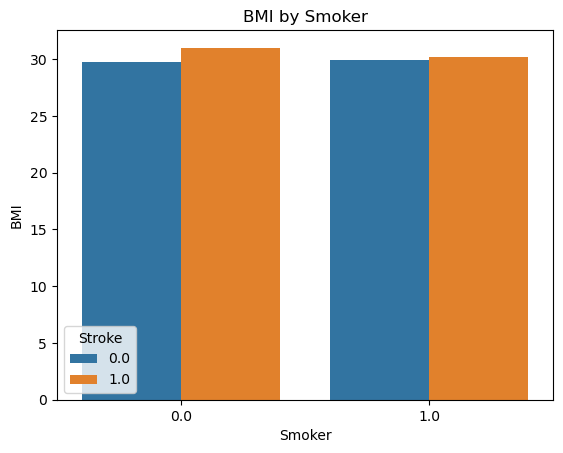

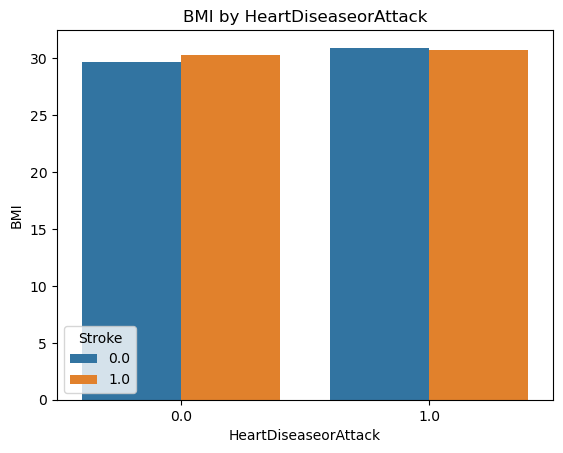

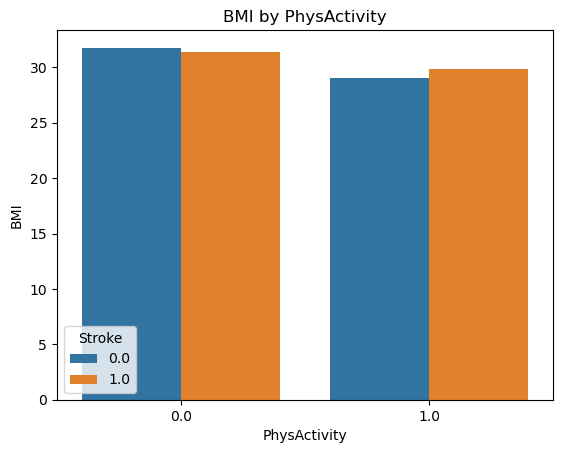

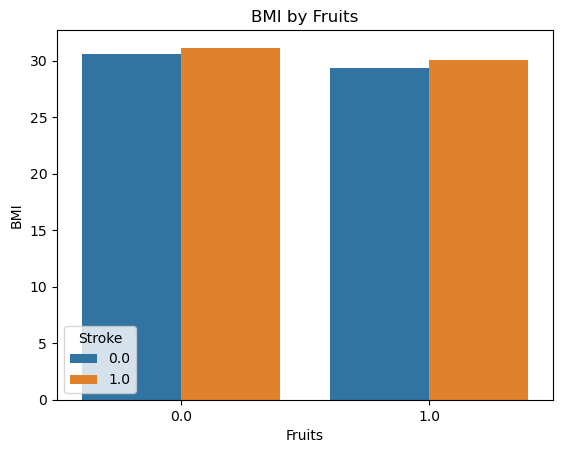

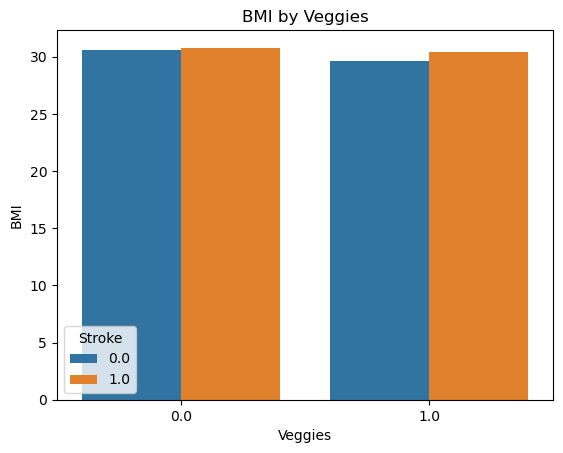

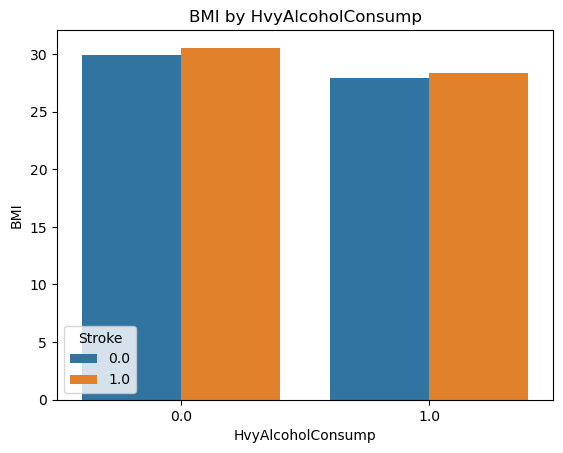

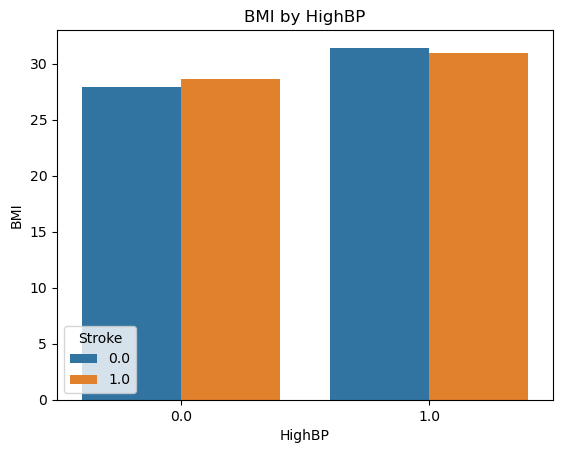

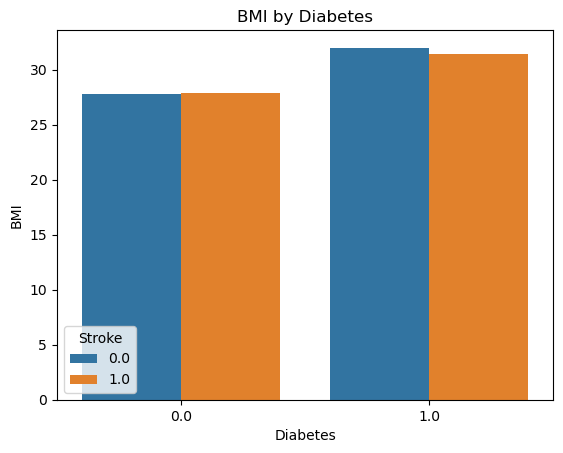

In [37]:
for z in dilist:
    plt.figure()
    sns.barplot( x=z, y= 'BMI', data=lt, hue='Stroke', errorbar=('ci', 0))
    plt.title( 'BMI by ' + z)
    plt.xlabel(z)
    plt.ylabel ('BMI')
    
plt.show;

In [ ]:
# spliting for test and train
Y = lt[['Stroke']]

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)